In [25]:
import pandas as pd
import sqlite3 as lite
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data from database

In [2]:
con = lite.connect('city_bike.db')
cur = con.cursor

In [4]:
df = pd.read_sql_query("select * from available_bikes order by execution_time",con, index_col='execution_time')

In [15]:
df.head()

,_72_INT,_79_INT,_82_INT,_83_INT,_116_INT,_119_INT,_120_INT,_127_INT,_128_INT,_137_INT,...,_3416_INT,_3417_INT,_3418_INT,_3419_INT,_3420_INT,_3421_INT,_3422_INT,_3423_INT,_3424_INT,_3425_INT
execution_time,,,,,,,,,,,,,,,,,,,,,
1472036633,30,5,16,38,11,10,7,25,4,4,...,14,27,0,12,12,0,10,0,0,8
1472036696,30,5,16,38,11,10,7,25,4,4,...,14,27,0,12,12,0,10,0,0,8
1472036749,30,6,16,38,11,10,7,25,4,5,...,14,27,0,12,12,0,10,0,0,8
1472036811,30,6,16,38,11,10,7,25,4,5,...,14,27,0,12,12,0,10,0,0,8
1472036875,30,6,16,38,11,10,7,25,4,5,...,14,27,0,12,12,0,10,0,0,8


In [7]:
df.shape

(52, 663)

## Calculate total activities of stations in an hour

In [11]:
type(df.columns.values)

numpy.ndarray

In [13]:
hour_change = defaultdict(int)

In [18]:
type(df['_72_INT'].tolist())

list

In [22]:
enumerate(df['_72_INT'].tolist())

enumerate

In [23]:
for col in df.columns:
    station_val = df[col].tolist()
    station_id = col[1:]
    change = 0
    for k,v in enumerate(station_val):
        if k<= len(station_val)-2:            
            change += abs(station_val[k] - station_val[k+1])
    hour_change[station_id]=change

## Visualize distribution of station activities

In [32]:
type(dict(hour_change))

dict

In [33]:
dict(hour_change)

{'116_INT': 39,
 '119_INT': 1,
 '120_INT': 5,
 '127_INT': 51,
 '128_INT': 37,
 '137_INT': 40,
 '143_INT': 15,
 '144_INT': 2,
 '146_INT': 15,
 '147_INT': 33,
 '150_INT': 24,
 '151_INT': 31,
 '152_INT': 21,
 '153_INT': 32,
 '157_INT': 7,
 '161_INT': 27,
 '164_INT': 29,
 '167_INT': 37,
 '168_INT': 50,
 '173_INT': 60,
 '174_INT': 35,
 '195_INT': 34,
 '2000_INT': 13,
 '2001_INT': 4,
 '2002_INT': 24,
 '2003_INT': 41,
 '2004_INT': 18,
 '2005_INT': 0,
 '2006_INT': 59,
 '2008_INT': 16,
 '2009_INT': 25,
 '2010_INT': 31,
 '2012_INT': 22,
 '2017_INT': 14,
 '2021_INT': 10,
 '2022_INT': 10,
 '2023_INT': 31,
 '212_INT': 26,
 '216_INT': 0,
 '217_INT': 4,
 '223_INT': 0,
 '224_INT': 4,
 '225_INT': 24,
 '228_INT': 50,
 '229_INT': 36,
 '232_INT': 7,
 '236_INT': 25,
 '237_INT': 35,
 '238_INT': 17,
 '239_INT': 22,
 '241_INT': 5,
 '242_INT': 9,
 '243_INT': 8,
 '244_INT': 11,
 '245_INT': 6,
 '247_INT': 8,
 '248_INT': 22,
 '249_INT': 23,
 '251_INT': 22,
 '252_INT': 31,
 '253_INT': 16,
 '254_INT': 22,
 '257_INT

In [36]:
df_change = pd.DataFrame(dict(hour_change),index=[0])

In [39]:
df_change = df_change.T

(array([ 308.,  127.,  100.,   63.,   36.,   13.,    7.,    4.,    4.,    1.]),
 array([  0. ,   9.1,  18.2,  27.3,  36.4,  45.5,  54.6,  63.7,  72.8,
         81.9,  91. ]),
 <a list of 10 Patch objects>)

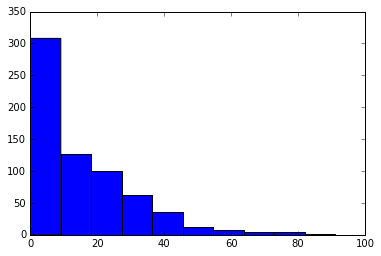

In [40]:
plt.hist(df_change)

In [45]:
max(df_change[0])

91

Find the winner station!

In [49]:
dict(hour_change).values

<function values>

In [53]:
v = list(hour_change.values())
k = list(hour_change.keys())
print(k[v.index(max(v))])

3186_INT
